<a href="https://colab.research.google.com/github/divyanshibargal/ML-Lab/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 class MyLinearRegression:
  # constractor initial hypothesis
    def __init__(self, weight=3, bias=5, learning_rate=0.0002,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0
#prediction
    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set
#error
    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)
#gradient update
    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists.
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]}

# Create DataFrame
studentscores = pd.DataFrame(data)

# Print the output.
studentscores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


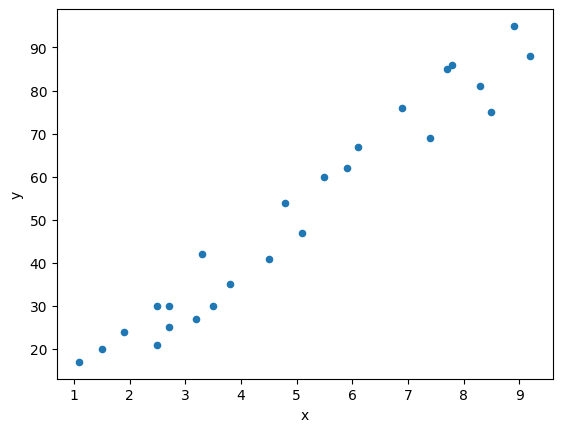

In [3]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [3.0861035]	 Bias: [5.01312]	 Cost: 675.9546014869682
Iteration: 1	 Weight: [3.17100353]	 Bias: [5.02605307]	 Cost: 657.6453145685986
Iteration: 2	 Weight: [3.25471692]	 Bias: [5.03880183]	 Cost: 639.8444903870922
Iteration: 3	 Weight: [3.33726026]	 Bias: [5.05136886]	 Cost: 622.5380084266409
Iteration: 4	 Weight: [3.41864992]	 Bias: [5.06375669]	 Cost: 605.7121403122198
Iteration: 5	 Weight: [3.49890201]	 Bias: [5.07596784]	 Cost: 589.3535389194461
Iteration: 6	 Weight: [3.57803247]	 Bias: [5.08800477]	 Cost: 573.4492277868703
Iteration: 7	 Weight: [3.65605695]	 Bias: [5.09986992]	 Cost: 557.9865908222965
Iteration: 8	 Weight: [3.73299094]	 Bias: [5.11156569]	 Cost: 542.9533622949704
Iteration: 9	 Weight: [3.80884968]	 Bias: [5.12309445]	 Cost: 528.3376171056921
Iteration: 10	 Weight: [3.8836482]	 Bias: [5.13445854]	 Cost: 514.1277613271403
Iteration: 11	 Weight: [3.95740134]	 Bias: [5.14566026]	 Cost: 500.3125230068976
Iteration: 12	 Weight: [4.0301237]	 Bias: [

<ipython-input-1-6812d0e48e85>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(total_error) / (2 * count)


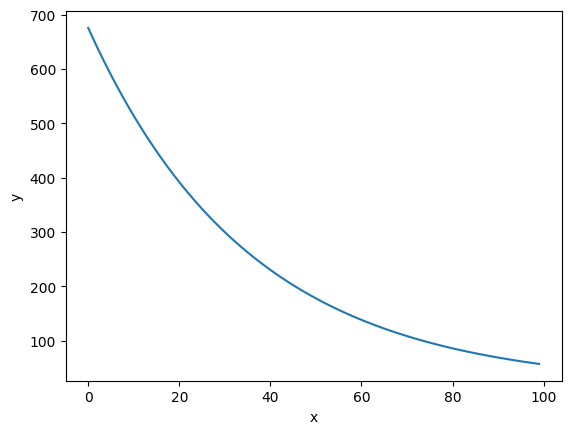

In [6]:
x=[int(x) for x in range(100)]
y=regressor.cost_trend
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

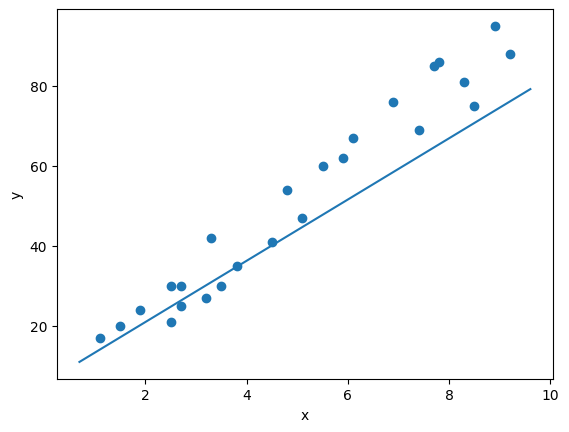

In [ ]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/sample_data/mnist_test.csv')
X = dataset.iloc[ : , : 1 ].values
Y = dataset.iloc[ : , 1 ].values
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [ ]:
Y_pred = regressor.predict(X_test)

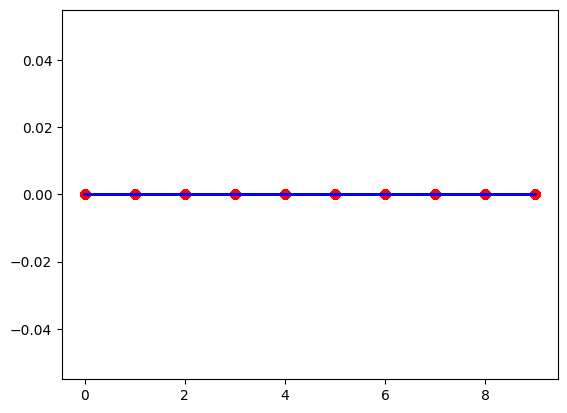

In [ ]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')